In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import os

In [4]:
################################
# NON-HYPERPARAMETER CONSTANTS #
################################
final_dataset_location = '/Volumes/GoogleDrive/My Drive/Crime Data/Final Folder/'
playground_dataset_location = '/Volumes/GoogleDrive/My Drive/Crime Data/Composute Data/Sean Workspace/'
trial_file_location = '/Users/sean/Documents/Education/Stanford/230/Project/Sean/Trials/'
# trial_file_location = '/home/ec2-user/cs230/crime_prediction/Sean/Trials/'
trial_file_format = 'CNN Trial %d.xlsx'
hyperparameter_file_columns = [
    'Training Cost',
    'Dev Cost',
    'Accuracy Evaluation Batch Size',
    'Maximum Crimes per Window',
    'Number of Anchor Boxes per Window',
    'Input Image Width',
    'Input Image Height',
    'Output Grid Width',
    'Output Grid Height',
    'Train Accuracy',
    'Dev Accuracy',
    'Duration',
    'Learning Rate',
    'Goal Total Epochs',
    'Minibatch Size',
    'Number of Minibatches',
    'Optimizer Name',
    'L2 Regularization Lambda']

There have been 5 training epochs.
The best dev set accuracy is 0.047000.
The corresponding train accuracy is 0.035000.
This was recorded on epoch 5.
Average epoch duration is 169.047307 seconds.


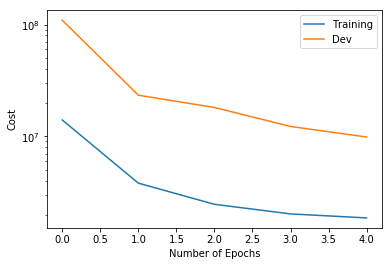

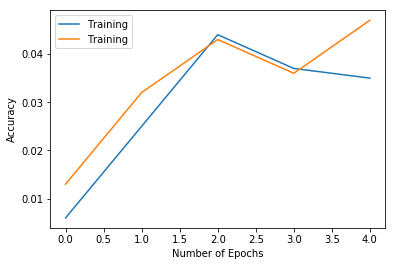

Other Hyperparameters (only first epoch):

Training Cost                       is    14018912.36585937
Dev Cost                            is            109391216
Accuracy Evaluation Batch Size      is                 1000
Maximum Crimes per Window           is                   20
Number of Anchor Boxes per Window   is                    5
Input Image Width                   is                   64
Input Image Height                  is                   64
Output Grid Width                   is                    1
Output Grid Height                  is                    1
Learning Rate                       is               0.0001
Goal Total Epochs                   is                 1000
Minibatch Size                      is                  100
Number of Minibatches               is                  100
Optimizer Name                      is                 Adam
L2 Regularization Lambda            is                    0


In [74]:
###################################################
# RETRIEVE AND PLOT THE MODEL'S TRAINING PROGRESS #
###################################################

trial_number = 6

if os.path.isfile(trial_file_location+trial_file_format % trial_number):
    hyperparameter_data = pd.read_excel(trial_file_location+trial_file_format % trial_number)
    train_costs = hyperparameter_data['Training Cost'].values
    dev_costs = hyperparameter_data['Dev Cost'].values
    train_accuracies = hyperparameter_data['Train Accuracy'].values
    dev_accuracies = hyperparameter_data['Dev Accuracy'].values
    average_duration = np.mean(hyperparameter_data['Duration'].values)
    
    # Print best dev accuracy and corresponding test accuracy
    best_dev_index = np.argmax(dev_accuracies)
    print('There have been %d training epochs.' % len(train_costs))
    print('The best dev set accuracy is %f.' % dev_accuracies[best_dev_index])
    print('The corresponding train accuracy is %f.' % train_accuracies[best_dev_index])
    print('This was recorded on epoch %d.' % (best_dev_index+1))
    print('Average epoch duration is %f seconds.' % average_duration)

    # Plot cost
    plt.plot(np.squeeze(train_costs), label='Training')
    plt.plot(np.squeeze(dev_costs), label='Dev')
    plt.ylabel('Cost')
    plt.xlabel('Number of Epochs')
    plt.legend()
    plt.yscale('log')
    plt.show()

    # Plot train and dev accuracy
    plt.plot(np.squeeze(train_accuracies), label='Training')
    plt.plot(np.squeeze(dev_accuracies), label='Training')
    plt.ylabel('Accuracy')
    plt.xlabel('Number of Epochs')
    plt.legend()
    plt.show()
    
    # Print the remaining parameters
    print('Other Hyperparameters (only first epoch):\n')
    for hyperparameter in hyperparameter_file_columns:
        if hyperparameter in ['Epoch Cost', 'Train Accuracy', 'Dev Accuracy', 'Duration']: continue
        print('{0:35} is {1:>20}'.format(hyperparameter, hyperparameter_data[hyperparameter][0]))
else:
    print("Trial not recorded.")